In [1]:
import sys
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.10.4 anndata==0.11.1 umap==0.5.6 numpy==1.26.4 scipy==1.11.4 pandas==2.2.3 scikit-learn==1.6.1 statsmodels==0.14.0 igraph==0.11.5 pynndescent==0.5.12


In [2]:
nr = sc.read_h5ad('./NR/NR_l6ct_filter.h5ad')
dr = sc.read_h5ad('./DR/DR_l6ct_filter.h5ad')

In [3]:
nr_ptime = pd.read_csv('./ptime/N_V2L_L6ct_V_pseudotime.txt',sep='\t')
dr_ptime = pd.read_csv('./ptime/D_V2L_L6ct_V_pseudotime.txt',sep='\t')

In [4]:
import seaborn as sns
sns.set_theme(style="ticks")

In [5]:
nr_exp=pd.DataFrame(nr.X.todense(),index=nr.obs.index,columns=nr.var.index)
nr_exp = nr_exp.reset_index()
nr_exp['cell_id_match'] = nr_exp['index'].str[:12]
df_ptime_nr = pd.merge(nr_exp, nr_ptime, left_on='cell_id_match', right_on='cell_id', how='left')

df_ptime_nr = df_ptime_nr.drop(columns=['cell_id_match', 'cell_id']).set_index('index')
df_ptime_nr = df_ptime_nr.dropna()
df_ptime_nr_sorted = df_ptime_nr.sort_values(by='velocity_pseudotime', ascending=True)


dr_exp=pd.DataFrame(dr.X.todense(),index=dr.obs.index,columns=dr.var.index)
dr_exp = dr_exp.reset_index()
dr_exp['cell_id_match'] = dr_exp['index'].str[:12]
df_ptime_dr = pd.merge(dr_exp, dr_ptime, left_on='cell_id_match', right_on='cell_id', how='left')

df_ptime_dr = df_ptime_dr.drop(columns=['cell_id_match', 'cell_id']).set_index('index')
df_ptime_dr = df_ptime_dr.dropna()
df_ptime_dr_sorted = df_ptime_dr.sort_values(by='velocity_pseudotime', ascending=True)

df_ptime_nr_sorted = df_ptime_nr.sort_values(by='velocity_pseudotime', ascending=True)
df_ptime_dr_sorted = df_ptime_dr.sort_values(by='velocity_pseudotime', ascending=True)
df_ptime_nr_sorted['index'] = range(df_ptime_nr_sorted.shape[0])
df_ptime_nr_sorted['index_bin'] = pd.cut(df_ptime_nr_sorted['index'], bins=np.arange(0, 1872 + 1872/50, 1872/50))
bin_means_nr = df_ptime_nr_sorted.groupby('index_bin').mean()
df_ptime_dr_sorted['index'] = range(df_ptime_dr_sorted.shape[0])
df_ptime_dr_sorted['index_bin'] = pd.cut(df_ptime_dr_sorted['index'], bins=np.arange(0, 1652 + 1652/50, 1652/50))
bin_means_dr = df_ptime_dr_sorted.groupby('index_bin').mean()
bin_means_nr['index'] = range(bin_means_nr.shape[0])
bin_means_dr['index'] = range(bin_means_dr.shape[0])

/var/folders/r4/hfj1yx3s3bd93mtgxzfwcfyc0000gn/T/ipykernel_12539/3137590657.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means_nr = df_ptime_nr_sorted.groupby('index_bin').mean()
/var/folders/r4/hfj1yx3s3bd93mtgxzfwcfyc0000gn/T/ipykernel_12539/3137590657.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means_dr = df_ptime_dr_sorted.groupby('index_bin').mean()


In [6]:
pc_gene = pd.read_csv('V2L_L6CT_Lasso_PC1rank.xls',sep='\t')

In [7]:
bin_means_nr_ = bin_means_nr
bin_means_nr_.index = list(bin_means_nr_['index'])
del bin_means_nr_['index']
bin_means_nr_T = bin_means_nr_.T

bin_means_dr_ = bin_means_dr
bin_means_dr_.index = list(bin_means_dr_['index'])
del bin_means_dr_['index']
bin_means_dr_T = bin_means_dr_.T

slope_ =[]
for i in range(bin_means_dr_T.shape[0]):
    x = np.array(bin_means_dr.index)
    y = np.array(bin_means_dr[bin_means_dr_T.index[i]])
    valid_indices = ~(np.isnan(x) | np.isnan(y) | np.isinf(x) | np.isinf(y))
    x = x[valid_indices]
    y = y[valid_indices]
    slope,intercept = np.polyfit(x, y,1)
    slope_.append(slope)
bin_means_dr_T['slope'] = slope_

slope_ =[]
for i in range(bin_means_nr_T.shape[0]):
    x = np.array(bin_means_nr.index)
    y = np.array(bin_means_nr[bin_means_nr_T.index[i]])
    valid_indices = ~(np.isnan(x) | np.isnan(y) | np.isinf(x) | np.isinf(y))
    x = x[valid_indices]
    y = y[valid_indices]
    slope,intercept = np.polyfit(x, y,1)
    slope_.append(slope)
bin_means_nr_T['slope'] = slope_

In [8]:
rcg = pc_gene[pc_gene['RCG'] == 'RCG']
rcg_gene = list(rcg['Gene'])
non_rcg = pc_gene[pc_gene['RCG'] == 'Non_RCG']
non_rcg_gene = list(non_rcg['Gene'])

In [9]:
rcg

Unnamed: 0.1  Unnamed: 0           Gene  nr_pc_lasso  dr_pc_lasso  \
8                8           8        Txndc15         4000          414   
11              11          11          Celf5         4000          854   
13              13          13           Mia2          504         4000   
14              14          14           Cd46          283         4000   
15              15          15         Hs3st2         2563           96   
...            ...         ...            ...          ...          ...   
1357          1357        1357  9630041A04Rik          517         4000   
1362          1362        1362            Dbp         4000          694   
1365          1365        1365          Disp2          304         4000   
1369          1369        1369            Xpa         1842          455   
1372          1372        1372           Mdh1          411         4000   

      foldchange     logFC  NR_slope  NR_slope_abs  DR_slope  DR_slope_abs  \
8       0.103724 -2.266021  0.000300      0.015017  0.001895      0.094760   
11      0.213697 -1.543198 -0.000173      0.008642 -0.000838      0.041910   
13      7.922772  2.069741  0.001956      0.097804  0.000017      0.000854   
14     14.088028  2.645325 -0.003667      0.183326 -0.001562      0.078124   
15      0.037832 -3.274613 -0.003120      0.156022 -0.009435      0.471759   
...          ...       ...       ...           ...       ...           ...   
1357    7.723938  2.044324  0.001538      0.076921  0.000578      0.028881   
1362    0.173707 -1.750388 -0.000044      0.002221 -0.001068      0.053397   
1365   13.118033  2.573988 -0.003371      0.168560 -0.000638      0.031892   
1369    0.247423 -1.396657 -0.000782      0.039109  0.001567      0.078362   
1372    9.711165  2.273276  0.002206      0.110300  0.000041      0.002036   

      NR_predicted_rank  DR_predicted_rank  NR_predicted_rank_final  \
8           1941.580424         493.751057              1941.580424   
11          2042.839340         913.458319              2042.839340   
13           442.105351        2418.651003               504.000000   
14           261.561444         571.124440               283.000000   
15           305.013620          96.238217              2563.000000   
...                 ...                ...                      ...   
1357         538.023146        1209.566847               517.000000   
1362        2314.871739         760.957918              2314.871739   
1365         283.354300        1122.415658               304.000000   
1369         935.310747         569.814680              1842.000000   
1372         424.476045        2259.318693               411.000000   

      DR_predicted_rank_final  foldchange_predicted  logFC_predicted  \
8                  414.000000              0.213633        -2.226791   
11                 854.000000              0.418330        -1.257285   
13                2418.651003              4.791388         2.260444   
14                 571.124440              2.014523         1.010438   
15                  96.000000              0.037832        -4.724268   
...                       ...                   ...              ...   
1357              1209.566847              2.337002         1.224659   
1362               694.000000              0.300103        -1.736470   
1365              1122.415658              3.683330         1.881011   
1369               455.000000              0.247423        -2.014950   
1372              2259.318693              5.486210         2.455810   

      subclassdeglogFC  RCG  
8             0.383579  RCG  
11            0.000000  RCG  
13            0.000000  RCG  
14            0.434460  RCG  
15            0.000000  RCG  
...                ...  ...  
1357         -0.463226  RCG  
1362          1.288594  RCG  
1365          0.252450  RCG  
1369          0.421402  RCG  
1372          0.000000  RCG  

[429 rows x 19 columns]

In [9]:
RCG = []
for i in range(bin_means_nr_T.shape[0]):
    if bin_means_nr_T.index[i] in rcg_gene:
        RCG.append('RCG')
    elif bin_means_nr_T.index[i] in non_rcg_gene:
        RCG.append('Non_RCG')
    else:
        RCG.append('No')
bin_means_nr_T['RCG'] = RCG
nr_rcg = bin_means_nr_T[bin_means_nr_T['RCG'] == 'RCG']
nr_rcg_sorted = nr_rcg.sort_values(by='slope', ascending=True)
nr_non_rcg = bin_means_nr_T[bin_means_nr_T['RCG'] == 'Non_RCG']
nr_non_rcg_sorted = nr_non_rcg.sort_values(by='slope', ascending=True)

RCG = []
for i in range(bin_means_dr_T.shape[0]):
    if bin_means_dr_T.index[i] in rcg_gene:
        RCG.append('RCG')
    elif bin_means_dr_T.index[i] in non_rcg_gene:
        RCG.append('Non_RCG')
    else:
        RCG.append('No')
bin_means_dr_T['RCG'] = RCG
dr_rcg = bin_means_dr_T[bin_means_dr_T['RCG'] == 'RCG']
dr_non_rcg = bin_means_dr_T[bin_means_dr_T['RCG'] == 'Non_RCG']

rcg_df = pd.DataFrame()
rcg_df.index=list(nr_rcg_sorted.index)
rcg_df['RCG_order']= range(nr_rcg_sorted.shape[0])
rcg_dic = rcg_df.to_dict()

RCG_order = []
for i in range(dr_rcg.shape[0]):
    if dr_rcg.index[i] in rcg_dic['RCG_order'].keys():
        RCG_order.append(rcg_dic['RCG_order'][dr_rcg.index[i]])
dr_rcg['RCG_order'] = RCG_order
dr_rcg_sorted = dr_rcg.sort_values(by='RCG_order', ascending=True)

rcg_df = pd.DataFrame()
rcg_df.index=list(nr_non_rcg_sorted.index)
rcg_df['RCG_order']= range(nr_non_rcg_sorted.shape[0])
rcg_dic = rcg_df.to_dict()

RCG_order = []
for i in range(dr_non_rcg.shape[0]):
    if dr_non_rcg.index[i] in rcg_dic['RCG_order'].keys():
        RCG_order.append(rcg_dic['RCG_order'][dr_non_rcg.index[i]])
    else:
        RCG_order.append('No')
dr_non_rcg['RCG_order'] = RCG_order
dr_non_rcg = dr_non_rcg[dr_non_rcg['RCG_order'] != 'No']
dr_non_rcg_sorted = dr_non_rcg.sort_values(by='RCG_order', ascending=True)

/var/folders/r4/hfj1yx3s3bd93mtgxzfwcfyc0000gn/T/ipykernel_51021/4154996857.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_rcg['RCG_order'] = RCG_order
/var/folders/r4/hfj1yx3s3bd93mtgxzfwcfyc0000gn/T/ipykernel_51021/4154996857.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_non_rcg['RCG_order'] = RCG_order


In [10]:
from scipy.stats import zscore

In [11]:
rcg_pos = rcg[rcg['logFC_predicted'] > 0]
rcg_neg = rcg[rcg['logFC_predicted'] <= 0]
non_rcg_pos = non_rcg[non_rcg['logFC_predicted'] > 0]
non_rcg_neg = non_rcg[non_rcg['logFC_predicted'] <= 0]

In [12]:
rcg_pos_gene = list(rcg_pos['Gene'])
rcg_neg_gene = list(rcg_neg['Gene'])

non_rcg_pos_gene = list(non_rcg_pos['Gene'])
non_rcg_neg_gene = list(non_rcg_neg['Gene'])

In [13]:
gene = []
for i in range(nr_rcg_sorted.shape[0]):
    if nr_rcg_sorted.index[i] in rcg_pos_gene:
        gene.append('RCG_pos')
    elif nr_rcg_sorted.index[i] in rcg_neg_gene:
        gene.append('RCG_neg')
nr_rcg_sorted['RCG_class'] = gene

gene = []
for i in range(dr_rcg_sorted.shape[0]):
    if dr_rcg_sorted.index[i] in rcg_pos_gene:
        gene.append('RCG_pos')
    elif dr_rcg_sorted.index[i] in rcg_neg_gene:
        gene.append('RCG_neg')
dr_rcg_sorted['RCG_class'] = gene

gene = []
for i in range(nr_non_rcg_sorted.shape[0]):
    if nr_non_rcg_sorted.index[i] in non_rcg_pos_gene:
        gene.append('RCG_pos')
    elif nr_non_rcg_sorted.index[i] in non_rcg_neg_gene:
        gene.append('RCG_neg')
nr_non_rcg_sorted['RCG_class'] = gene

gene = []
for i in range(dr_non_rcg_sorted.shape[0]):
    if dr_non_rcg_sorted.index[i] in non_rcg_pos_gene:
        gene.append('RCG_pos')
    elif dr_non_rcg_sorted.index[i] in non_rcg_neg_gene:
        gene.append('RCG_neg')
dr_non_rcg_sorted['RCG_class'] = gene

In [15]:
nr_rcg_sorted

0         1         2         3         4         5         6  \
Mgat4c   3.198214  3.281198  3.185246  3.347008  3.245425  3.315924  3.388171   
Lrp1b    3.385194  3.155847  3.266548  3.350110  3.237374  3.031075  3.148060   
Sdk2     2.196060  1.838680  1.726320  1.594012  1.794923  1.724777  1.763481   
Dapk1    1.145099  1.066952  1.304452  0.939105  1.026875  0.897923  1.295865   
Fut9     1.920807  1.542625  1.918960  1.723671  2.045328  2.156413  2.032701   
...           ...       ...       ...       ...       ...       ...       ...   
Fstl4    0.127338  0.213592  0.407254  0.114073  0.267008  0.263160  0.112017   
Sgcz     1.467175  1.250930  1.326433  1.758341  1.796802  1.699537  1.968358   
Pde10a   1.388083  1.249855  1.527245  1.241613  1.457281  1.536099  1.488169   
Pitpnc1  0.434184  0.329901  0.609761  0.311749  0.418390  0.556634  0.120766   
Cdh12    0.217230  0.565272  0.198690  0.381207  0.222205  0.345604  0.311898   

                7         8         9  ...        44        45        46  \
Mgat4c   3.098086  3.291627  3.194680  ...  1.563682  1.219960  1.364917   
Lrp1b    3.076212  3.039600  3.096591  ...  2.284910  2.155480  2.221975   
Sdk2     1.681529  1.448568  1.367346  ...  1.099659  1.071454  0.919539   
Dapk1    1.017499  1.019475  1.246900  ...  0.221002  0.430339  0.496908   
Fut9     1.850524  1.839199  1.902853  ...  1.574057  1.171454  1.157321   
...           ...       ...       ...  ...       ...       ...       ...   
Fstl4    0.076550  0.358592  0.475212  ...  0.907070  0.791705  0.593806   
Sgcz     1.779572  1.544161  1.867628  ...  2.504186  2.187517  2.267920   
Pde10a   1.349645  1.523774  1.860407  ...  1.967468  2.167369  1.827240   
Pitpnc1  0.308045  0.315637  0.277799  ...  1.307742  0.995316  1.424000   
Cdh12    0.453950  0.311428  0.345107  ...  1.463055  1.392677  1.121642   

               47        48        49  50     slope  RCG  RCG_class  
Mgat4c   1.491103  1.441467  1.307606 NaN -0.053775  RCG    RCG_pos  
Lrp1b    2.140685  2.101278  2.032873 NaN -0.032108  RCG    RCG_pos  
Sdk2     0.998342  1.055366  1.021429 NaN -0.019480  RCG    RCG_pos  
Dapk1    0.443544  0.460841  0.333251 NaN -0.015254  RCG    RCG_pos  
Fut9     1.303769  1.185240  1.147177 NaN -0.014522  RCG    RCG_pos  
...           ...       ...       ...  ..       ...  ...        ...  
Fstl4    0.904078  0.731386  0.666253 NaN  0.013800  RCG    RCG_pos  
Sgcz     2.214056  2.195750  2.443941 NaN  0.016368  RCG    RCG_pos  
Pde10a   2.045011  2.181638  1.621502 NaN  0.016864  RCG    RCG_pos  
Pitpnc1  1.087677  0.903154  0.908072 NaN  0.020812  RCG    RCG_pos  
Cdh12    1.655717  1.449216  1.361270 NaN  0.029784  RCG    RCG_neg  

[429 rows x 54 columns]

In [16]:
dr_rcg_sorted

0         1         2         3         4         5         6  \
Mgat4c   3.243529  3.380930  3.351324  3.522630  3.353748  3.320929  3.316214   
Lrp1b    3.199265  3.318580  3.308093  3.347892  3.265317  3.336399  3.451733   
Sdk2     1.967791  1.959063  1.568918  1.825707  1.638680  1.780642  1.551547   
Dapk1    1.255966  1.167311  1.472787  1.124481  0.783831  0.648162  1.170182   
Fut9     1.946059  2.006452  2.069636  2.206633  1.797192  2.018757  1.957097   
...           ...       ...       ...       ...       ...       ...       ...   
Fstl4    0.061772  0.289110  0.102163  0.098998  0.212664  0.225974  0.128591   
Sgcz     1.961555  2.157246  2.614884  2.074363  2.250977  2.057034  2.396561   
Pde10a   1.350477  1.448776  1.144557  1.014134  1.614694  1.461138  1.408469   
Pitpnc1  0.367600  0.604685  0.378739  0.263970  0.195379  0.133820  0.325496   
Cdh12    0.367820  0.359861  0.415735  0.247011  0.185005  0.223056  0.165866   

                7         8         9  ...        44        45        46  \
Mgat4c   3.243524  3.360806  3.463728  ...  1.764602  1.977850  1.547337   
Lrp1b    3.266378  3.244282  3.184262  ...  2.226197  2.427738  2.284096   
Sdk2     1.678275  1.561524  1.845953  ...  1.221837  1.428913  1.199152   
Dapk1    0.944604  1.251651  0.864047  ...  0.712543  0.762505  0.772521   
Fut9     1.826966  2.183320  2.214242  ...  1.541381  1.298945  1.493362   
...           ...       ...       ...  ...       ...       ...       ...   
Fstl4    0.080588  0.282991  0.121454  ...  0.290477  0.508071  0.437332   
Sgcz     2.311207  2.400509  2.401049  ...  2.238373  2.750311  2.687747   
Pde10a   1.261528  1.703823  1.765568  ...  1.870827  1.643481  1.544622   
Pitpnc1  0.192996  0.117961  0.145080  ...  0.893458  0.524725  0.665664   
Cdh12    0.370798  0.223719  0.279651  ...  1.566585  1.666529  2.081480   

               47        48        49     slope  RCG  RCG_order  RCG_class  
Mgat4c   1.364976  2.116724  1.703725 -0.036609  RCG          0    RCG_pos  
Lrp1b    2.267001  2.381666  2.215182 -0.020704  RCG          1    RCG_pos  
Sdk2     0.865628  1.284330  0.918244 -0.011539  RCG          2    RCG_pos  
Dapk1    0.624300  0.705097  0.652406 -0.008768  RCG          3    RCG_pos  
Fut9     1.835536  1.731995  1.673939 -0.008433  RCG          4    RCG_pos  
...           ...       ...       ...       ...  ...        ...        ...  
Fstl4    0.391351  0.234345  0.272441  0.006919  RCG        424    RCG_pos  
Sgcz     2.907160  2.867585  2.624328  0.008136  RCG        425    RCG_pos  
Pde10a   1.459576  1.586525  1.791328  0.007629  RCG        426    RCG_pos  
Pitpnc1  0.630137  0.822883  0.856423  0.010312  RCG        427    RCG_pos  
Cdh12    1.600158  1.916011  1.976271  0.037724  RCG        428    RCG_neg  

[429 rows x 54 columns]

In [14]:
nr_rcg_sorted_pos = nr_rcg_sorted[nr_rcg_sorted['RCG_class'] == 'RCG_pos']
nr_rcg_sorted_neg = nr_rcg_sorted[nr_rcg_sorted['RCG_class'] == 'RCG_neg']


dr_rcg_sorted_pos = dr_rcg_sorted[dr_rcg_sorted['RCG_class'] == 'RCG_pos']
dr_rcg_sorted_neg = dr_rcg_sorted[dr_rcg_sorted['RCG_class'] == 'RCG_neg']


nr_non_rcg_sorted_pos = nr_non_rcg_sorted[nr_non_rcg_sorted['RCG_class'] == 'RCG_pos']
nr_non_rcg_sorted_neg = nr_non_rcg_sorted[nr_non_rcg_sorted['RCG_class'] == 'RCG_neg']


dr_non_rcg_sorted_pos = dr_non_rcg_sorted[dr_non_rcg_sorted['RCG_class'] == 'RCG_pos']
dr_non_rcg_sorted_neg = dr_non_rcg_sorted[dr_non_rcg_sorted['RCG_class'] == 'RCG_neg']

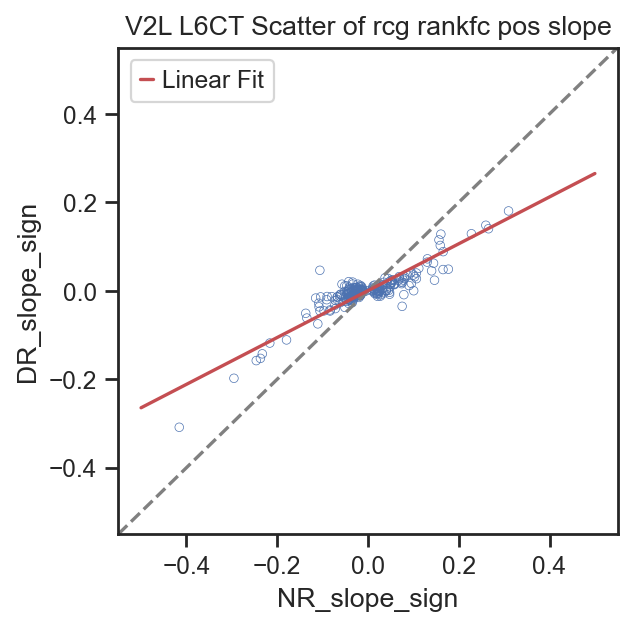

In [18]:
nr_dr_rcg_pos = pd.DataFrame()
nr_dr_rcg_pos.index = list(nr_rcg_sorted_pos.index)
nr_dr_rcg_pos['NR_slope'] = list(nr_rcg_sorted_pos['slope'])
nr_dr_rcg_pos['DR_slope'] = list(dr_rcg_sorted_pos['slope'])

nr_dr_rcg_pos['NR_slope*50'] = nr_dr_rcg_pos['NR_slope']*50
nr_dr_rcg_pos['DR_slope*50'] = nr_dr_rcg_pos['DR_slope']*50

nr_dr_rcg_pos['NR_slope_sign'] = np.log10(nr_dr_rcg_pos['NR_slope*50'].abs()+1)*np.sign(nr_dr_rcg_pos['NR_slope*50'])
nr_dr_rcg_pos['DR_slope_sign'] = np.log10(nr_dr_rcg_pos['DR_slope*50'].abs()+1)*np.sign(nr_dr_rcg_pos['DR_slope*50'])

fig, ax = plt.subplots(figsize=(4, 4))

scatter_plot = sns.scatterplot(
    data=nr_dr_rcg_pos,
    x='NR_slope_sign',
    y='DR_slope_sign',
    s=15,
    marker='o',
    edgecolor='b',
    facecolor='none',
    ax=ax
)

plt.title('V2L L6CT Scatter of rcg rankfc pos slope')
plt.xlim(-0.55, 0.55)
plt.ylim(-0.55, 0.55)

limits = [-0.55, 0.55]
ax.plot(limits, limits, linestyle='--', color='gray')

x = nr_dr_rcg_pos['NR_slope_sign']
y = nr_dr_rcg_pos['DR_slope_sign']
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

x_fit = np.linspace(-0.5, 0.5, 100)
y_fit = slope * x_fit + intercept
ax.plot(x_fit, y_fit, color='r', label='Linear Fit')

plt.legend()


plt.savefig('V2L_L6CT_Scatter_of_rcg_slope_rankfc_posfit.pdf')

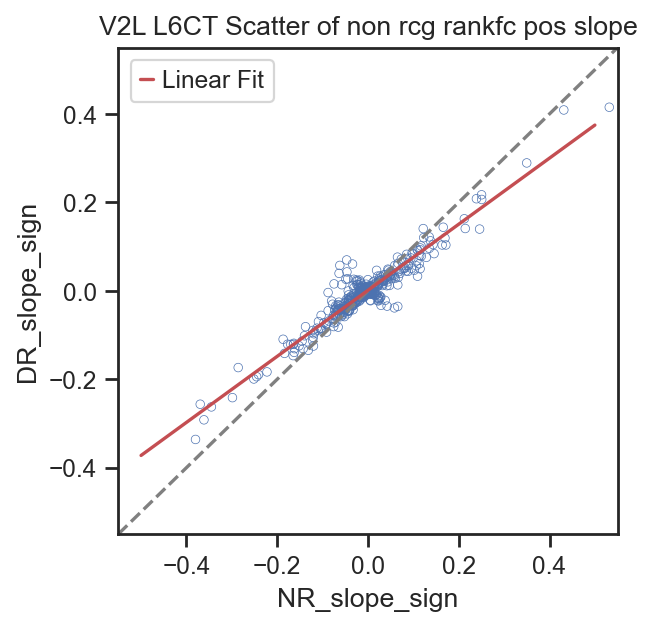

In [19]:
nr_dr_non_rcg_pos = pd.DataFrame()
nr_dr_non_rcg_pos.index = list(nr_non_rcg_sorted_pos.index)
nr_dr_non_rcg_pos['NR_slope'] = list(nr_non_rcg_sorted_pos['slope'])
nr_dr_non_rcg_pos['DR_slope'] = list(dr_non_rcg_sorted_pos['slope'])

nr_dr_non_rcg_pos['NR_slope*50'] = nr_dr_non_rcg_pos['NR_slope']*50
nr_dr_non_rcg_pos['DR_slope*50'] = nr_dr_non_rcg_pos['DR_slope']*50

nr_dr_non_rcg_pos['NR_slope_sign'] = np.log10(nr_dr_non_rcg_pos['NR_slope*50'].abs()+1)*np.sign(nr_dr_non_rcg_pos['NR_slope*50'])
nr_dr_non_rcg_pos['DR_slope_sign'] = np.log10(nr_dr_non_rcg_pos['DR_slope*50'].abs()+1)*np.sign(nr_dr_non_rcg_pos['DR_slope*50'])

fig, ax = plt.subplots(figsize=(4, 4))

scatter_plot = sns.scatterplot(
    data=nr_dr_non_rcg_pos,
    x='NR_slope_sign',
    y='DR_slope_sign',
    s=15,
    marker='o',
    edgecolor='b',
    facecolor='none',
    ax=ax
)

plt.title('V2L L6CT Scatter of non rcg rankfc pos slope')
plt.xlim(-0.55, 0.55)
plt.ylim(-0.55, 0.55)

limits = [-0.55, 0.55]
ax.plot(limits, limits, linestyle='--', color='gray')

x = nr_dr_non_rcg_pos['NR_slope_sign']
y = nr_dr_non_rcg_pos['DR_slope_sign']
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

x_fit = np.linspace(-0.5, 0.5, 100)
y_fit = slope * x_fit + intercept
ax.plot(x_fit, y_fit, color='r', label='Linear Fit')

plt.legend()

plt.savefig('V2L_L6CT_Scatter_of_non_rcg_slope_rankfc_posfit.pdf')

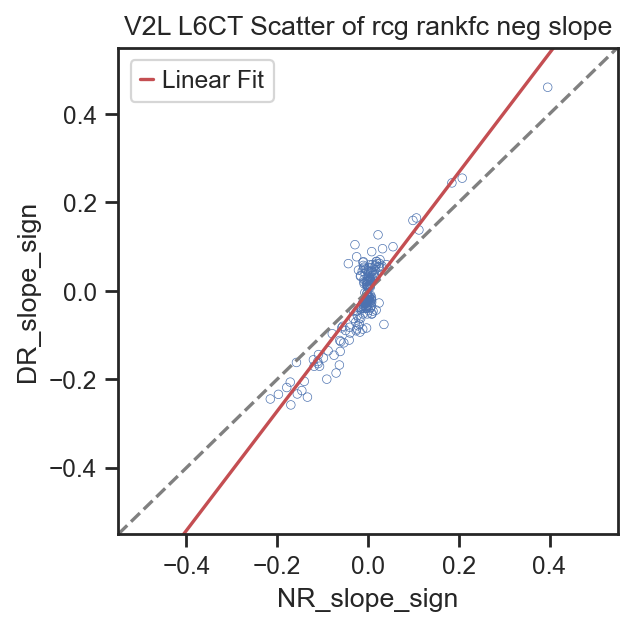

In [20]:
nr_dr_rcg_neg = pd.DataFrame()
nr_dr_rcg_neg.index = list(nr_rcg_sorted_neg.index)
nr_dr_rcg_neg['NR_slope'] = list(nr_rcg_sorted_neg['slope'])
nr_dr_rcg_neg['DR_slope'] = list(dr_rcg_sorted_neg['slope'])

nr_dr_rcg_neg['NR_slope*100'] = nr_dr_rcg_neg['NR_slope']*50
nr_dr_rcg_neg['DR_slope*100'] = nr_dr_rcg_neg['DR_slope']*50

nr_dr_rcg_neg['NR_slope_sign'] = np.log10(nr_dr_rcg_neg['NR_slope*100'].abs()+1)*np.sign(nr_dr_rcg_neg['NR_slope*100'])
nr_dr_rcg_neg['DR_slope_sign'] = np.log10(nr_dr_rcg_neg['DR_slope*100'].abs()+1)*np.sign(nr_dr_rcg_neg['DR_slope*100'])


fig, ax = plt.subplots(figsize=(4, 4))


scatter_plot = sns.scatterplot(
    data=nr_dr_rcg_neg,
    x='NR_slope_sign',
    y='DR_slope_sign',
    s=15,
    marker='o',
    edgecolor='b',
    facecolor='none',
    ax=ax
)

plt.title('V2L L6CT Scatter of rcg rankfc neg slope')
plt.xlim(-0.55, 0.55)
plt.ylim(-0.55, 0.55)

limits = [-0.55, 0.55]
ax.plot(limits, limits, linestyle='--', color='gray')

x = nr_dr_rcg_neg['NR_slope_sign']
y = nr_dr_rcg_neg['DR_slope_sign']
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

x_fit = np.linspace(-0.5, 0.5, 100)
y_fit = slope * x_fit + intercept
ax.plot(x_fit, y_fit, color='r', label='Linear Fit')
plt.legend()

plt.savefig('V2L_L6CT_Scatter_of_rcg_slope_rankfc_neg_fit.pdf')

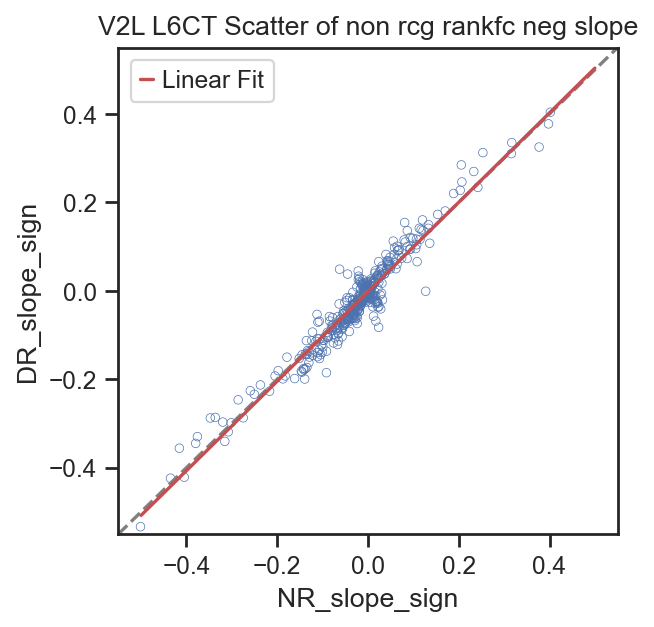

In [21]:
nr_dr_non_rcg_neg = pd.DataFrame()
nr_dr_non_rcg_neg.index = list(nr_non_rcg_sorted_neg.index)
nr_dr_non_rcg_neg['NR_slope'] = list(nr_non_rcg_sorted_neg['slope'])
nr_dr_non_rcg_neg['DR_slope'] = list(dr_non_rcg_sorted_neg['slope'])

nr_dr_non_rcg_neg['NR_slope*100'] = nr_dr_non_rcg_neg['NR_slope']*50
nr_dr_non_rcg_neg['DR_slope*100'] = nr_dr_non_rcg_neg['DR_slope']*50

nr_dr_non_rcg_neg['NR_slope_sign'] = np.log10(nr_dr_non_rcg_neg['NR_slope*100'].abs()+1)*np.sign(nr_dr_non_rcg_neg['NR_slope*100'])
nr_dr_non_rcg_neg['DR_slope_sign'] = np.log10(nr_dr_non_rcg_neg['DR_slope*100'].abs()+1)*np.sign(nr_dr_non_rcg_neg['DR_slope*100'])

fig, ax = plt.subplots(figsize=(4, 4))

scatter_plot = sns.scatterplot(
    data=nr_dr_non_rcg_neg,
    x='NR_slope_sign',
    y='DR_slope_sign',
    s=15,
    marker='o',
    edgecolor='b',
    facecolor='none',
    ax=ax
)

plt.title('V2L L6CT Scatter of non rcg rankfc neg slope')
plt.xlim(-0.55, 0.55)
plt.ylim(-0.55, 0.55)

limits = [-0.55, 0.55]
ax.plot(limits, limits, linestyle='--', color='gray')

x = nr_dr_non_rcg_neg['NR_slope_sign']
y = nr_dr_non_rcg_neg['DR_slope_sign']
coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients

x_fit = np.linspace(-0.5, 0.5, 100)
y_fit = slope * x_fit + intercept
ax.plot(x_fit, y_fit, color='r', label='Linear Fit')

plt.legend()

plt.savefig('V2L_L6CT_Scatter_of_non_rcg_slope_rankfc_neg_fit.pdf')

In [15]:
nr_rcg_sorted_pos = nr_rcg_sorted_pos.sort_values(by='slope', ascending=True)

rcg_df = pd.DataFrame()
rcg_df.index=list(nr_rcg_sorted_pos.index)
rcg_df['RCG_order']= range(nr_rcg_sorted_pos.shape[0])
rcg_dic = rcg_df.to_dict()

RCG_order = []
for i in range(dr_rcg_sorted_pos.shape[0]):
    if dr_rcg_sorted_pos.index[i] in rcg_dic['RCG_order'].keys():
        RCG_order.append(rcg_dic['RCG_order'][dr_rcg_sorted_pos.index[i]])
dr_rcg_sorted_pos['RCG_order'] = RCG_order
dr_rcg_sorted_pos = dr_rcg_sorted_pos.sort_values(by='RCG_order', ascending=True)

dr_rcg_sorted_neg = dr_rcg_sorted_neg.sort_values(by='slope', ascending=True)
rcg_df = pd.DataFrame()
rcg_df.index=list(dr_rcg_sorted_neg.index)
rcg_df['RCG_order']= range(dr_rcg_sorted_neg.shape[0])
rcg_dic = rcg_df.to_dict()

RCG_order = []
for i in range(nr_rcg_sorted_neg.shape[0]):
    if nr_rcg_sorted_neg.index[i] in rcg_dic['RCG_order'].keys():
        RCG_order.append(rcg_dic['RCG_order'][nr_rcg_sorted_neg.index[i]])
    else:
        RCG_order.append('No')
nr_rcg_sorted_neg['RCG_order'] = RCG_order
nr_rcg_sorted_neg = nr_rcg_sorted_neg[nr_rcg_sorted_neg['RCG_order'] != 'No']
nr_rcg_sorted_neg = nr_rcg_sorted_neg.sort_values(by='RCG_order', ascending=True)

/var/folders/r4/hfj1yx3s3bd93mtgxzfwcfyc0000gn/T/ipykernel_51021/2106222261.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr_rcg_sorted_pos['RCG_order'] = RCG_order
/var/folders/r4/hfj1yx3s3bd93mtgxzfwcfyc0000gn/T/ipykernel_51021/2106222261.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nr_rcg_sorted_neg['RCG_order'] = RCG_order


In [16]:
nr_rcg_sorted_pos = nr_rcg_sorted_pos.iloc[:, :50]
nr_rcg_sorted_neg = nr_rcg_sorted_neg.iloc[:, :50]

dr_rcg_sorted_pos = dr_rcg_sorted_pos.iloc[:, :50]
dr_rcg_sorted_neg = dr_rcg_sorted_neg.iloc[:, :50]

nr_non_rcg_sorted_pos = nr_non_rcg_sorted_pos.iloc[:, :50]
nr_non_rcg_sorted_neg = nr_non_rcg_sorted_neg.iloc[:, :50]

dr_non_rcg_sorted_pos = dr_non_rcg_sorted_pos.iloc[:, :50]
dr_non_rcg_sorted_neg = dr_non_rcg_sorted_neg.iloc[:, :50]

In [23]:
nr_rcg_sorted_pos

0         1         2         3         4         5         6   \
Mgat4c   3.198214  3.281198  3.185246  3.347008  3.245425  3.315924  3.388171   
Lrp1b    3.385194  3.155847  3.266548  3.350110  3.237374  3.031075  3.148060   
Sdk2     2.196060  1.838680  1.726320  1.594012  1.794923  1.724777  1.763481   
Dapk1    1.145099  1.066952  1.304452  0.939105  1.026875  0.897923  1.295865   
Fut9     1.920807  1.542625  1.918960  1.723671  2.045328  2.156413  2.032701   
...           ...       ...       ...       ...       ...       ...       ...   
Tmem178  1.077718  1.162907  1.404549  1.076763  1.266845  1.426811  1.500063   
Fstl4    0.127338  0.213592  0.407254  0.114073  0.267008  0.263160  0.112017   
Sgcz     1.467175  1.250930  1.326433  1.758341  1.796802  1.699537  1.968358   
Pde10a   1.388083  1.249855  1.527245  1.241613  1.457281  1.536099  1.488169   
Pitpnc1  0.434184  0.329901  0.609761  0.311749  0.418390  0.556634  0.120766   

               7         8         9   ...        40        41        42  \
Mgat4c   3.098086  3.291627  3.194680  ...  1.054451  0.989579  1.280974   
Lrp1b    3.076212  3.039600  3.096591  ...  1.781436  1.829129  1.987577   
Sdk2     1.681529  1.448568  1.367346  ...  0.764956  0.935664  0.790866   
Dapk1    1.017499  1.019475  1.246900  ...  0.324615  0.601720  0.402649   
Fut9     1.850524  1.839199  1.902853  ...  1.413133  1.445707  1.511317   
...           ...       ...       ...  ...       ...       ...       ...   
Tmem178  0.915574  1.294016  1.381248  ...  1.634518  1.695067  1.584492   
Fstl4    0.076550  0.358592  0.475212  ...  0.734562  0.706374  0.809583   
Sgcz     1.779572  1.544161  1.867628  ...  1.928607  2.235451  2.281458   
Pde10a   1.349645  1.523774  1.860407  ...  2.483631  2.061344  1.854412   
Pitpnc1  0.308045  0.315637  0.277799  ...  1.361206  1.307585  0.930088   

               43        44        45        46        47        48        49  
Mgat4c   1.267563  1.563682  1.219960  1.364917  1.491103  1.441467  1.307606  
Lrp1b    2.034740  2.284910  2.155480  2.221975  2.140685  2.101278  2.032873  
Sdk2     1.104236  1.099659  1.071454  0.919539  0.998342  1.055366  1.021429  
Dapk1    0.516971  0.221002  0.430339  0.496908  0.443544  0.460841  0.333251  
Fut9     1.185300  1.574057  1.171454  1.157321  1.303769  1.185240  1.147177  
...           ...       ...       ...       ...       ...       ...       ...  
Tmem178  1.389845  1.722279  1.756491  1.694510  1.615076  1.789848  1.591558  
Fstl4    0.506419  0.907070  0.791705  0.593806  0.904078  0.731386  0.666253  
Sgcz     2.272048  2.504186  2.187517  2.267920  2.214056  2.195750  2.443941  
Pde10a   1.949695  1.967468  2.167369  1.827240  2.045011  2.181638  1.621502  
Pitpnc1  1.076032  1.307742  0.995316  1.424000  1.087677  0.903154  0.908072  

[231 rows x 50 columns]

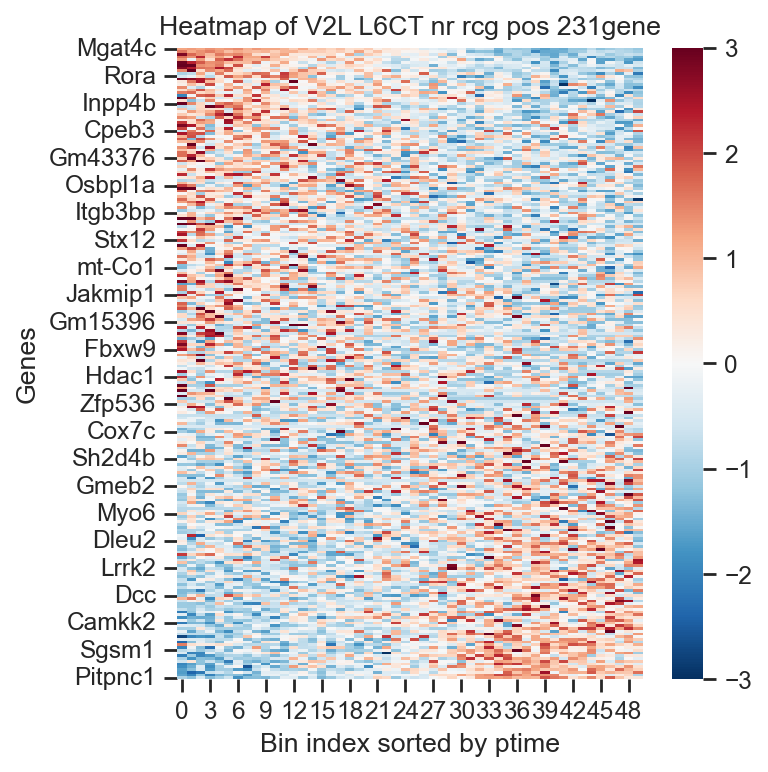

In [17]:
nr_rcg_sorted_pos_zscore = nr_rcg_sorted_pos.apply(zscore, axis=1)

plt.figure(figsize=(5,5))
sns.heatmap(nr_rcg_sorted_pos_zscore, cmap='RdBu_r', fmt='.2f',vmin=-3,vmax=3)
plt.title('Heatmap of V2L L6CT nr rcg pos 231gene')
plt.xlabel('Bin index sorted by ptime')
plt.ylabel('Genes')
plt.tight_layout()
plt.savefig('Heatmap_of_V2L_L6CT_NR_RCG_pos_sorterd.pdf')

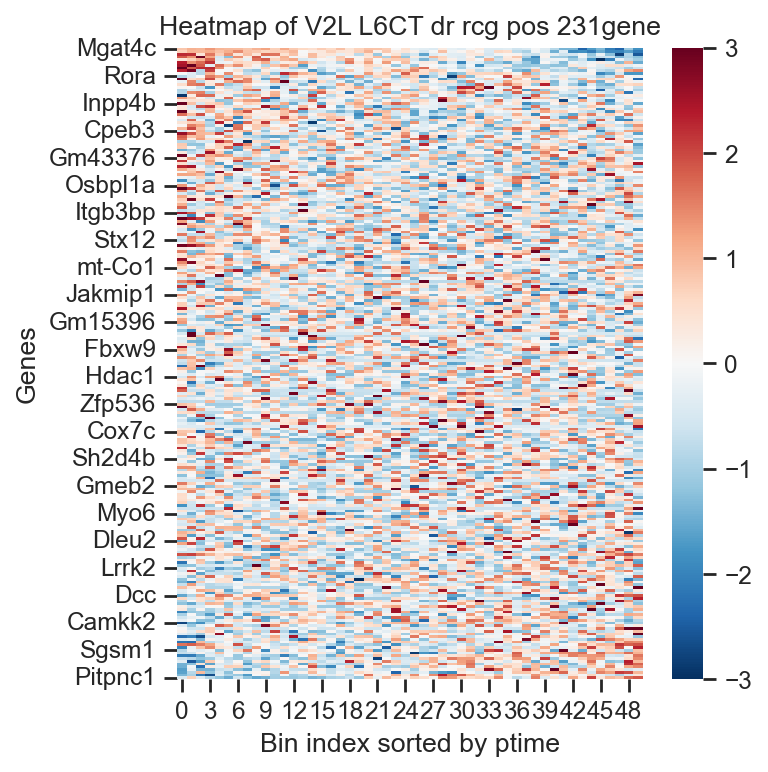

In [25]:
dr_rcg_sorted_pos_zscore = dr_rcg_sorted_pos.apply(zscore, axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(dr_rcg_sorted_pos_zscore, cmap='RdBu_r', fmt='.2f',vmin=-3,vmax=3)
plt.title('Heatmap of V2L L6CT dr rcg pos 231gene')
plt.xlabel('Bin index sorted by ptime')
plt.ylabel('Genes')
plt.tight_layout()

plt.savefig('Heatmap_of_V2L_L6CT_DR_RCG_pos_sorterd.pdf')

In [26]:
nr_non_rcg_sorted_pos

0         1         2         3         4         5         6   \
Grm5    2.604566  2.366879  2.485477  2.675065  2.358695  2.602688  2.440419   
Celf4   2.839994  2.465069  2.392191  2.362189  2.451805  2.589763  2.379483   
Csmd3   2.070032  2.023479  1.612614  1.738242  1.943470  1.812118  1.655017   
Tmeff2  2.228879  2.037539  1.803285  2.006136  1.952604  1.844658  1.960121   
Thrb    1.403638  1.324311  1.037794  1.147705  0.706226  1.035005  0.702172   
...          ...       ...       ...       ...       ...       ...       ...   
Ptchd4  0.041373  0.000000  0.084370  0.000000  0.037492  0.034389  0.073573   
Slit3   0.496031  0.840226  0.610277  0.830869  1.021694  0.692504  0.940235   
Maml3   0.542875  0.834019  0.721309  0.853847  0.891837  0.662944  0.716412   
Car10   1.253651  1.584476  1.439926  1.168081  1.315181  1.484732  1.498809   
Brinp3  0.113402  0.282745  0.190747  0.125056  0.150865  0.189170  0.220498   

              7         8         9   ...        40        41        42  \
Grm5    2.472925  2.582727  2.574590  ...  1.517587  1.316940  1.291161   
Celf4   2.199052  2.497246  2.199612  ...  1.489252  1.608738  1.526558   
Csmd3   1.605581  1.811385  1.808415  ...  0.807220  0.815345  0.699115   
Tmeff2  2.008476  2.036537  2.074154  ...  0.967973  1.203707  1.325445   
Thrb    0.807340  0.617852  0.817641  ...  0.122766  0.075004  0.178339   
...          ...       ...       ...  ...       ...       ...       ...   
Ptchd4  0.000000  0.042836  0.083778  ...  0.840391  0.796181  0.899193   
Slit3   0.880575  0.770765  0.664025  ...  1.605406  1.052350  1.329987   
Maml3   0.680896  0.518498  0.530792  ...  1.511497  1.588974  1.654564   
Car10   1.411842  1.420217  1.558691  ...  2.480526  2.688774  2.558616   
Brinp3  0.074771  0.110637  0.125900  ...  2.208511  1.782688  1.873468   

              43        44        45        46        47        48        49  
Grm5    1.701539  1.410911  1.322748  1.371976  1.336511  1.187394  1.307948  
Celf4   1.547804  1.481214  1.441200  1.035099  1.226958  1.176125  1.227978  
Csmd3   0.827071  0.686224  0.719220  0.780599  1.071323  0.782293  0.980042  
Tmeff2  1.195250  0.939846  0.808979  1.238997  1.085655  1.069004  0.996986  
Thrb    0.152465  0.128030  0.132167  0.084155  0.093843  0.205848  0.036908  
...          ...       ...       ...       ...       ...       ...       ...  
Ptchd4  0.566868  0.422708  0.433369  0.595132  0.413872  0.693527  0.360230  
Slit3   1.266186  1.589124  1.030340  1.504418  1.458230  1.267305  1.320449  
Maml3   1.399124  1.624207  1.326817  1.744087  1.263577  1.344095  1.468293  
Car10   2.790910  2.883755  2.799790  2.502725  2.681724  2.729387  2.656240  
Brinp3  1.803367  2.193458  1.988405  1.803117  1.630611  1.942433  1.800024  

[467 rows x 50 columns]

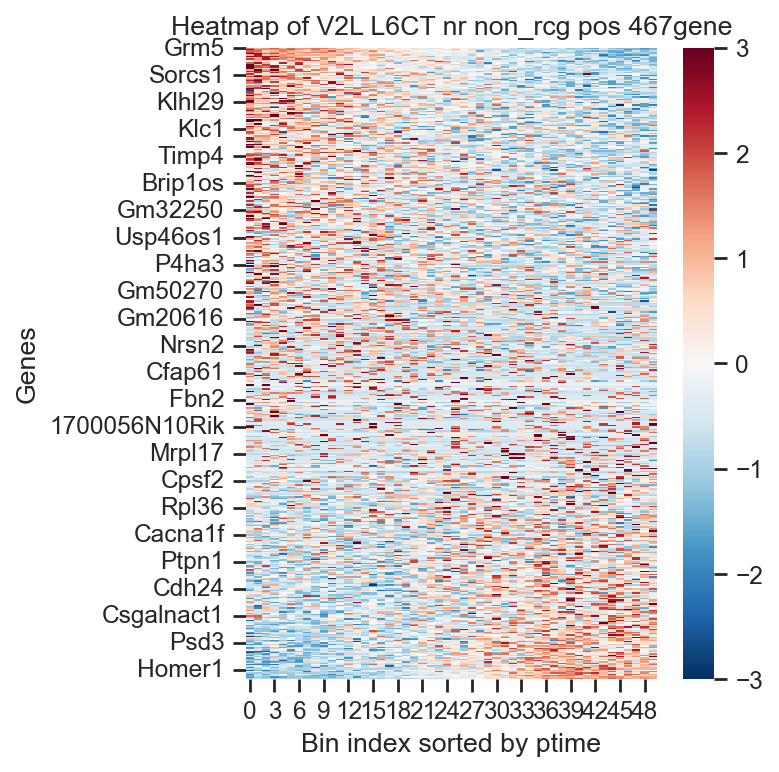

In [27]:
nr_non_rcg_sorted_pos_zscore = nr_non_rcg_sorted_pos.apply(zscore, axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(nr_non_rcg_sorted_pos_zscore, cmap='RdBu_r', fmt='.2f',vmin=-3,vmax=3)
plt.title('Heatmap of V2L L6CT nr non_rcg pos 467gene')
plt.xlabel('Bin index sorted by ptime')
plt.ylabel('Genes')
plt.tight_layout()
plt.savefig('Heatmap_of_V2L_L6CT_NR_non_RCG_pos_sorterd.pdf')

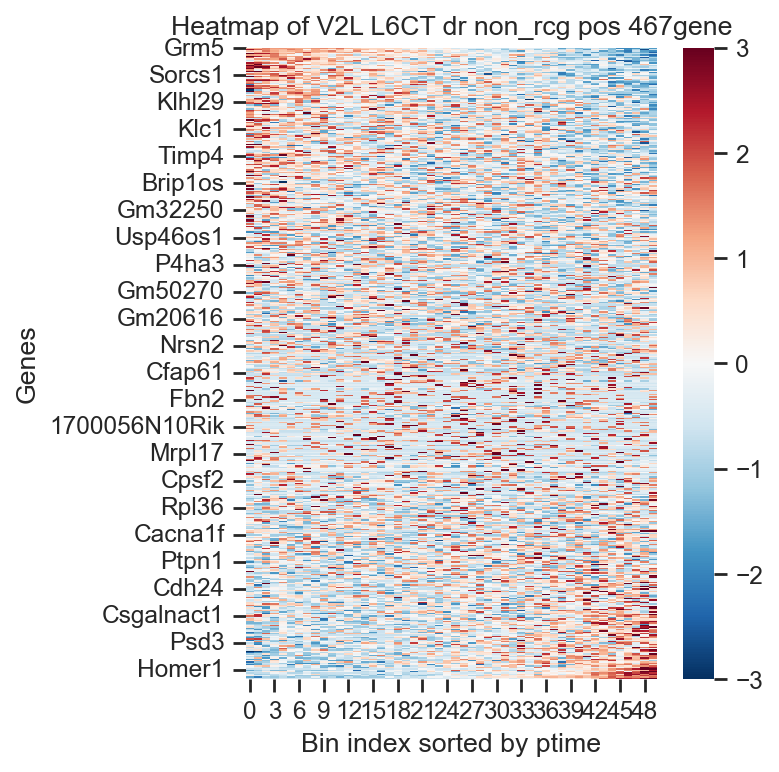

In [28]:
dr_non_rcg_sorted_pos_zscore = dr_non_rcg_sorted_pos.apply(zscore, axis=1)

plt.figure(figsize=(5,5))
sns.heatmap(dr_non_rcg_sorted_pos_zscore, cmap='RdBu_r', fmt='.2f',vmin=-3,vmax=3)
plt.title('Heatmap of V2L L6CT dr non_rcg pos 467gene')
plt.xlabel('Bin index sorted by ptime')
plt.ylabel('Genes')
plt.tight_layout()
plt.savefig('Heatmap_of_V2L_L6CT_DR_non_RCG_pos_sorterd.pdf')

In [18]:
nr_rcg_sorted_neg

0         1         2         3         4         5   \
6530403H02Rik  0.478525  0.465521  0.470414  0.508537  0.483840  0.405102   
Ano4           1.227404  1.346716  1.456736  1.428589  1.408908  1.332487   
Adamtsl1       0.217621  0.232939  0.082338  0.378558  0.389977  0.605498   
Plxna4         0.645868  0.742241  0.907668  0.950532  0.806592  0.835661   
Galntl6        0.755687  0.649891  0.617255  0.719951  0.833526  0.634511   
...                 ...       ...       ...       ...       ...       ...   
Zfp804a        0.570864  0.254981  0.252119  0.225403  0.081606  0.300638   
Prkg1          1.857164  1.620049  1.234074  1.538508  1.126905  1.059376   
Syndig1        0.160153  0.358235  0.000000  0.088187  0.089534  0.128386   
Edil3          0.068179  0.191655  0.119214  0.308907  0.297508  0.226431   
Cdh12          0.217230  0.565272  0.198690  0.381207  0.222205  0.345604   

                     6         7         8         9   ...        40  \
6530403H02Rik  0.411908  0.214580  0.534145  0.262033  ...  0.046901   
Ano4           1.500977  1.139819  1.053546  1.700070  ...  1.057195   
Adamtsl1       0.341328  0.577798  0.584238  0.779559  ...  0.037273   
Plxna4         0.790409  0.561546  0.700567  0.909874  ...  0.305722   
Galntl6        0.739308  0.306892  0.666282  0.201718  ...  0.175579   
...                 ...       ...       ...       ...  ...       ...   
Zfp804a        0.354454  0.204504  0.327549  0.364042  ...  0.523251   
Prkg1          1.244768  0.804947  0.864279  0.868862  ...  1.371359   
Syndig1        0.242232  0.221102  0.129975  0.180991  ...  0.797164   
Edil3          0.407141  0.268414  0.233530  0.199895  ...  0.567286   
Cdh12          0.311898  0.453950  0.311428  0.345107  ...  1.328401   

                     41        42        43        44        45        46  \
6530403H02Rik  0.000000  0.000000  0.000000  0.037079  0.000000  0.000000   
Ano4           0.818396  0.796403  1.069834  0.835986  0.934887  0.836560   
Adamtsl1       0.130426  0.088097  0.167298  0.039438  0.063091  0.040483   
Plxna4         0.453002  0.249622  0.536654  0.268656  0.462877  0.135135   
Galntl6        0.228619  0.481830  0.402184  0.305012  0.215904  0.266277   
...                 ...       ...       ...       ...       ...       ...   
Zfp804a        0.389262  0.489540  0.388071  0.723923  0.581074  0.493217   
Prkg1          1.165565  1.275783  1.335931  1.195162  1.349040  1.215901   
Syndig1        0.759437  0.340832  0.545649  0.410608  0.371675  0.532873   
Edil3          0.855978  0.728218  0.708822  0.900903  0.657138  0.579067   
Cdh12          1.322979  1.654851  1.166134  1.463055  1.392677  1.121642   

                     47        48        49  
6530403H02Rik  0.000000  0.000000  0.000000  
Ano4           0.874136  0.665163  0.999878  
Adamtsl1       0.170795  0.041327  0.000000  
Plxna4         0.292650  0.504789  0.379083  
Galntl6        0.425070  0.215392  0.163598  
...                 ...       ...       ...  
Zfp804a        0.405669  0.623170  0.694893  
Prkg1          1.559321  1.057065  1.482007  
Syndig1        0.715067  0.743002  0.570408  
Edil3          0.854965  0.748580  0.590668  
Cdh12          1.655717  1.449216  1.361270  

[198 rows x 50 columns]

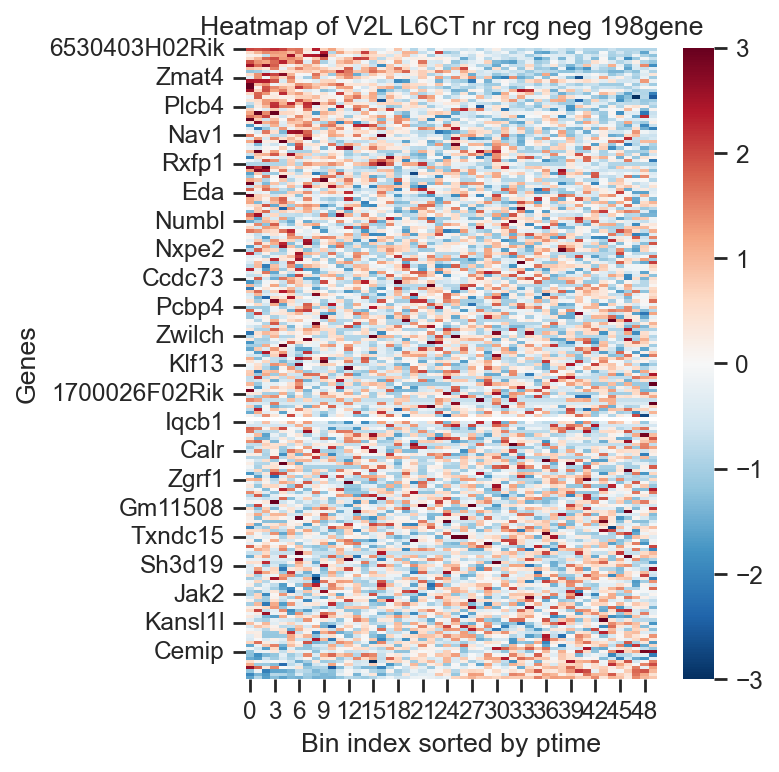

In [19]:
nr_rcg_sorted_neg_zscore = nr_rcg_sorted_neg.apply(zscore, axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(nr_rcg_sorted_neg_zscore, cmap='RdBu_r', fmt='.2f',vmin=-3,vmax=3)
plt.title('Heatmap of V2L L6CT nr rcg neg 198gene')
plt.xlabel('Bin index sorted by ptime')
plt.ylabel('Genes')
plt.tight_layout()
plt.savefig('Heatmap_of_V2L_L6CT_NR_RCG_neg_sorterd.pdf')

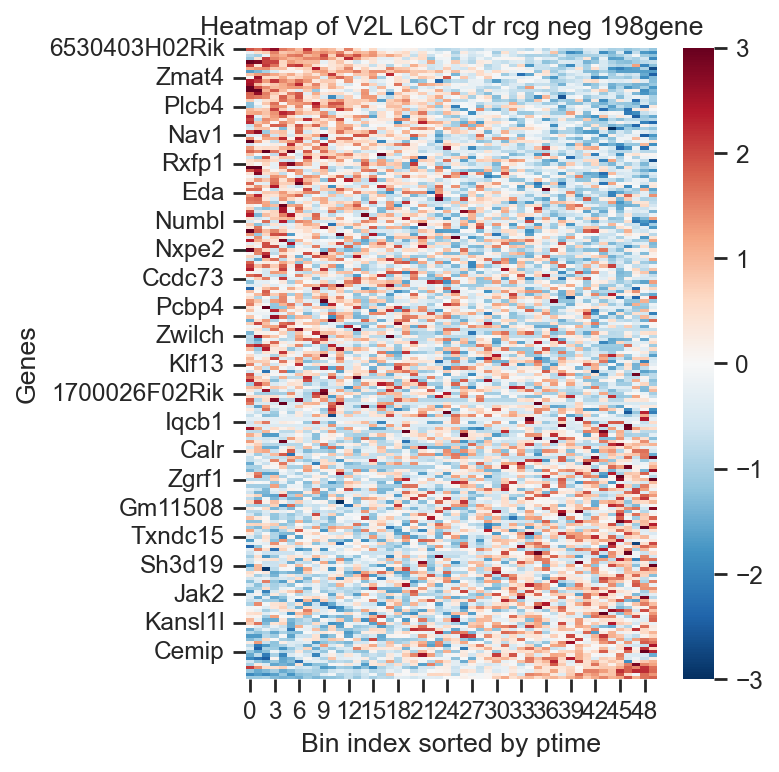

In [20]:
dr_rcg_sorted_neg_zscore = dr_rcg_sorted_neg.apply(zscore, axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(dr_rcg_sorted_neg_zscore, cmap='RdBu_r', fmt='.2f',vmin=-3,vmax=3)
plt.title('Heatmap of V2L L6CT dr rcg neg 198gene')
plt.xlabel('Bin index sorted by ptime')
plt.ylabel('Genes')
plt.tight_layout()
plt.savefig('Heatmap_of_V2L_L6CT_DR_RCG_neg_sorterd.pdf')

In [32]:
nr_non_rcg_sorted_neg

0         1         2         3         4         5         6   \
Gabrg3  2.380190  2.478365  2.492884  2.714070  2.710152  2.525142  2.494159   
Grid2   1.754497  2.009627  1.932743  2.228823  2.013988  2.250637  1.970157   
Lrrtm4  2.987928  3.236877  3.168740  3.152111  3.202311  2.712708  2.540649   
Pcdh15  1.220161  1.525661  1.721696  1.879733  2.018669  2.348512  2.339522   
Egfem1  2.404218  2.048435  2.091010  1.951729  1.994397  2.156054  2.079580   
...          ...       ...       ...       ...       ...       ...       ...   
Chrm3   1.857830  1.644661  1.727021  1.858447  1.626846  1.804281  1.461812   
Efna5   0.315695  0.261760  0.514415  0.474686  0.320435  0.320645  0.376930   
Mast4   1.408042  1.556540  1.249731  1.344204  1.252651  1.423761  1.078583   
Robo2   0.703913  0.700850  0.649036  0.495732  0.663107  0.573034  0.917871   
Astn2   0.935347  0.746621  0.855016  1.035978  1.137128  0.940485  1.188229   

              7         8         9   ...        40        41        42  \
Gabrg3  2.722994  2.368735  2.691621  ...  0.433027  0.491676  0.800443   
Grid2   1.665229  1.805219  1.835954  ...  0.182171  0.331652  0.172179   
Lrrtm4  2.606437  2.270936  2.205010  ...  1.394470  1.568540  1.588759   
Pcdh15  2.374767  2.542450  2.635436  ...  0.690817  1.124012  1.169365   
Egfem1  2.093446  1.936449  2.044548  ...  0.679208  0.964347  1.044556   
...          ...       ...       ...  ...       ...       ...       ...   
Chrm3   1.643846  1.418626  1.608258  ...  2.315281  2.277074  2.323446   
Efna5   0.300269  0.238876  0.232147  ...  1.179037  1.127121  1.019609   
Mast4   0.924571  1.127671  1.195033  ...  2.153505  2.284911  2.370603   
Robo2   0.752149  0.659486  0.799229  ...  1.896070  2.016161  1.666415   
Astn2   1.251473  1.161445  1.056735  ...  2.019843  2.300412  2.177541   

              43        44        45        46        47        48        49  
Gabrg3  0.511647  0.625647  0.595687  0.321014  0.789397  0.562602  0.525016  
Grid2   0.273618  0.119344  0.206946  0.190796  0.176488  0.088764  0.221877  
Lrrtm4  1.401662  1.498518  1.569832  1.481222  1.048091  1.545889  1.468947  
Pcdh15  0.916409  0.855417  1.008496  0.850989  0.991753  1.065756  1.109637  
Egfem1  0.752406  0.669905  0.640710  0.950069  0.638231  0.761371  0.518190  
...          ...       ...       ...       ...       ...       ...       ...  
Chrm3   2.507034  2.460468  2.325002  2.338369  2.376467  2.277549  2.130989  
Efna5   1.059849  1.488833  1.301888  1.208368  1.194569  0.976021  1.185964  
Mast4   2.381498  2.401979  2.383937  2.281730  2.377527  2.297467  2.413733  
Robo2   1.832794  1.884579  1.937882  2.033427  1.935355  1.857539  2.025518  
Astn2   2.512102  2.505986  2.223861  2.501502  2.149469  2.181595  1.782984  

[481 rows x 50 columns]

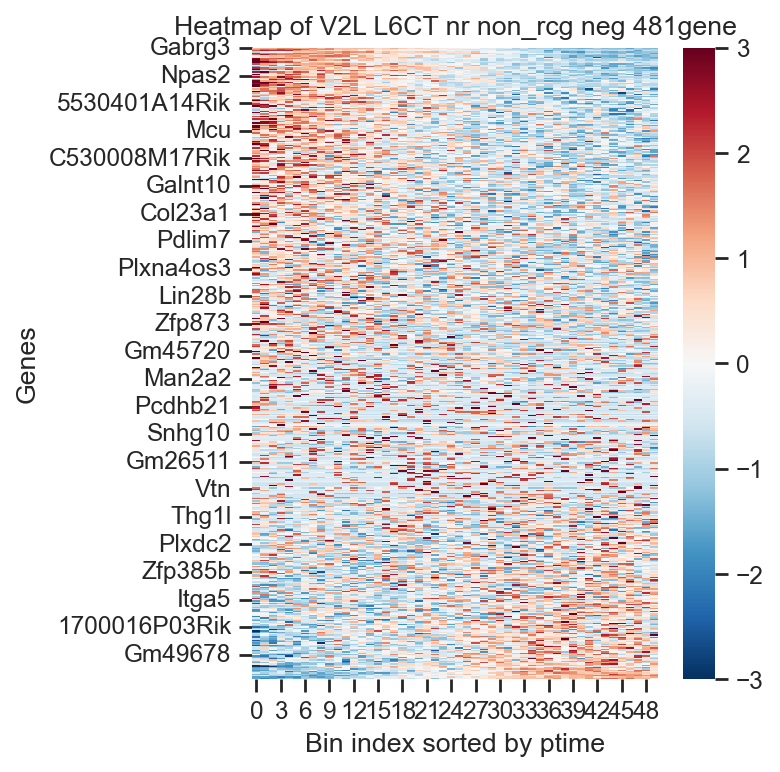

In [33]:
nr_non_rcg_sorted_neg_zscore = nr_non_rcg_sorted_neg.apply(zscore, axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(nr_non_rcg_sorted_neg_zscore, cmap='RdBu_r', fmt='.2f',vmin=-3,vmax=3)
plt.title('Heatmap of V2L L6CT nr non_rcg neg 481gene')
plt.xlabel('Bin index sorted by ptime')
plt.ylabel('Genes')
plt.tight_layout()
plt.savefig('Heatmap_of_V2L_L6CT_NR_non_RCG_neg_sorterd.pdf')

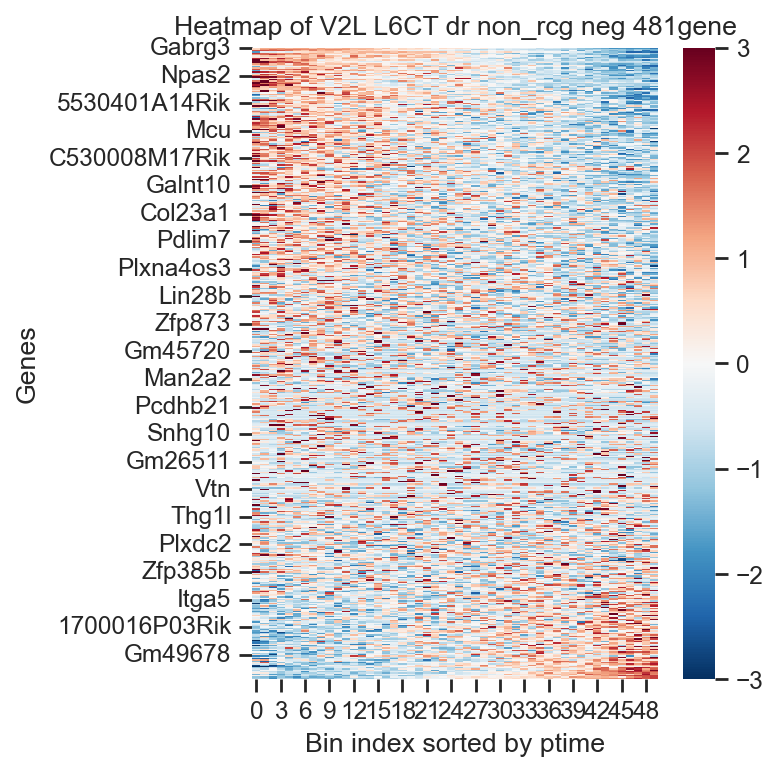

In [34]:
dr_non_rcg_sorted_neg_zscore = dr_non_rcg_sorted_neg.apply(zscore, axis=1)
plt.figure(figsize=(5,5))
sns.heatmap(dr_non_rcg_sorted_neg_zscore, cmap='RdBu_r', fmt='.2f',vmin=-3,vmax=3)
plt.title('Heatmap of V2L L6CT dr non_rcg neg 481gene')
plt.xlabel('Bin index sorted by ptime')
plt.ylabel('Genes')
plt.tight_layout()
plt.savefig('Heatmap_of_V2L_L6CT_DR_non_RCG_neg_sorterd.pdf')

In [21]:
with open('V2L_L6CT_Non_RCG_neg_ordered.xls', 'w') as f:
    for i in nr_non_rcg_sorted_neg.index:
        f.write(f'{i}\n')

In [22]:
with open('V2L_L6CT_Non_RCG_pos_ordered.xls', 'w') as f:
    for i in nr_non_rcg_sorted_pos.index:
        f.write(f'{i}\n')

In [23]:
with open('V2L_L6CT_RCG_neg_ordered.xls', 'w') as f:
    for i in nr_rcg_sorted_neg.index:
        f.write(f'{i}\n')

In [24]:
with open('V2L_L6CT_RCG_pos_ordered.xls', 'w') as f:
    for i in nr_rcg_sorted_pos.index:
        f.write(f'{i}\n')

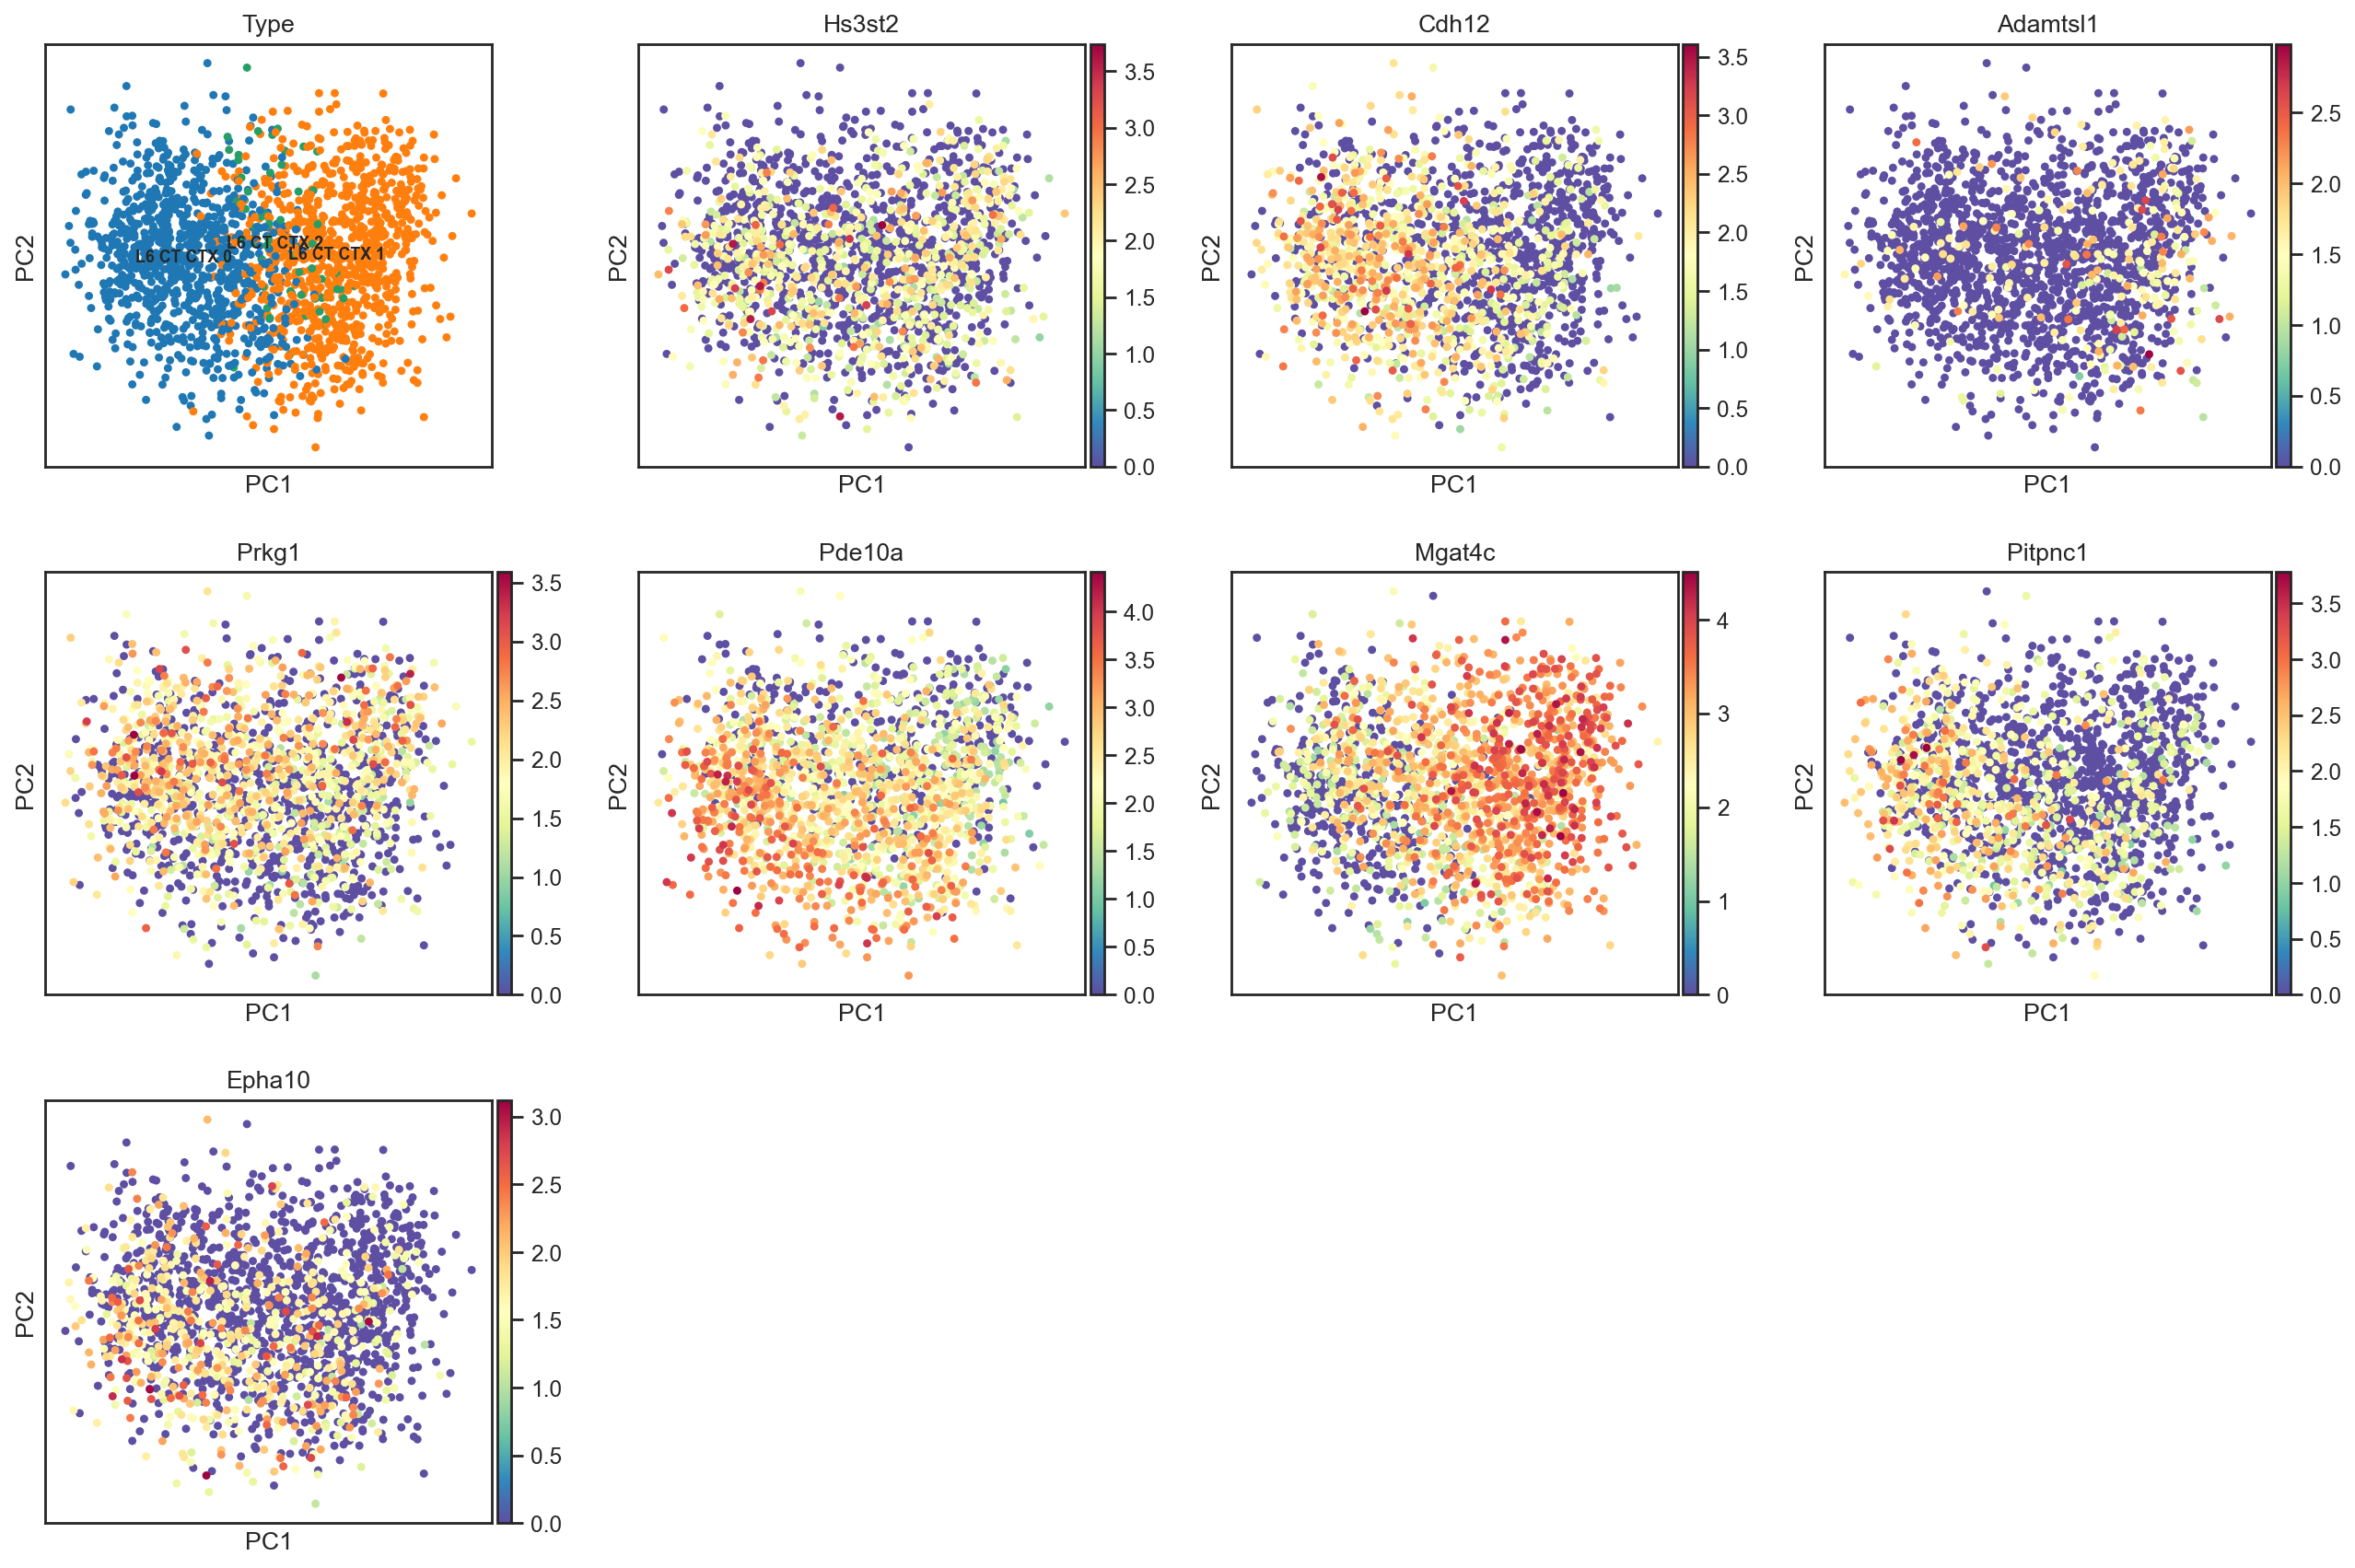

In [7]:
sc.pl.pca(nr,color=["Type","Hs3st2","Cdh12","Adamtsl1","Prkg1","Pde10a","Mgat4c","Pitpnc1","Epha10"],legend_fontsize=8,legend_loc="on data",cmap='Spectral_r')

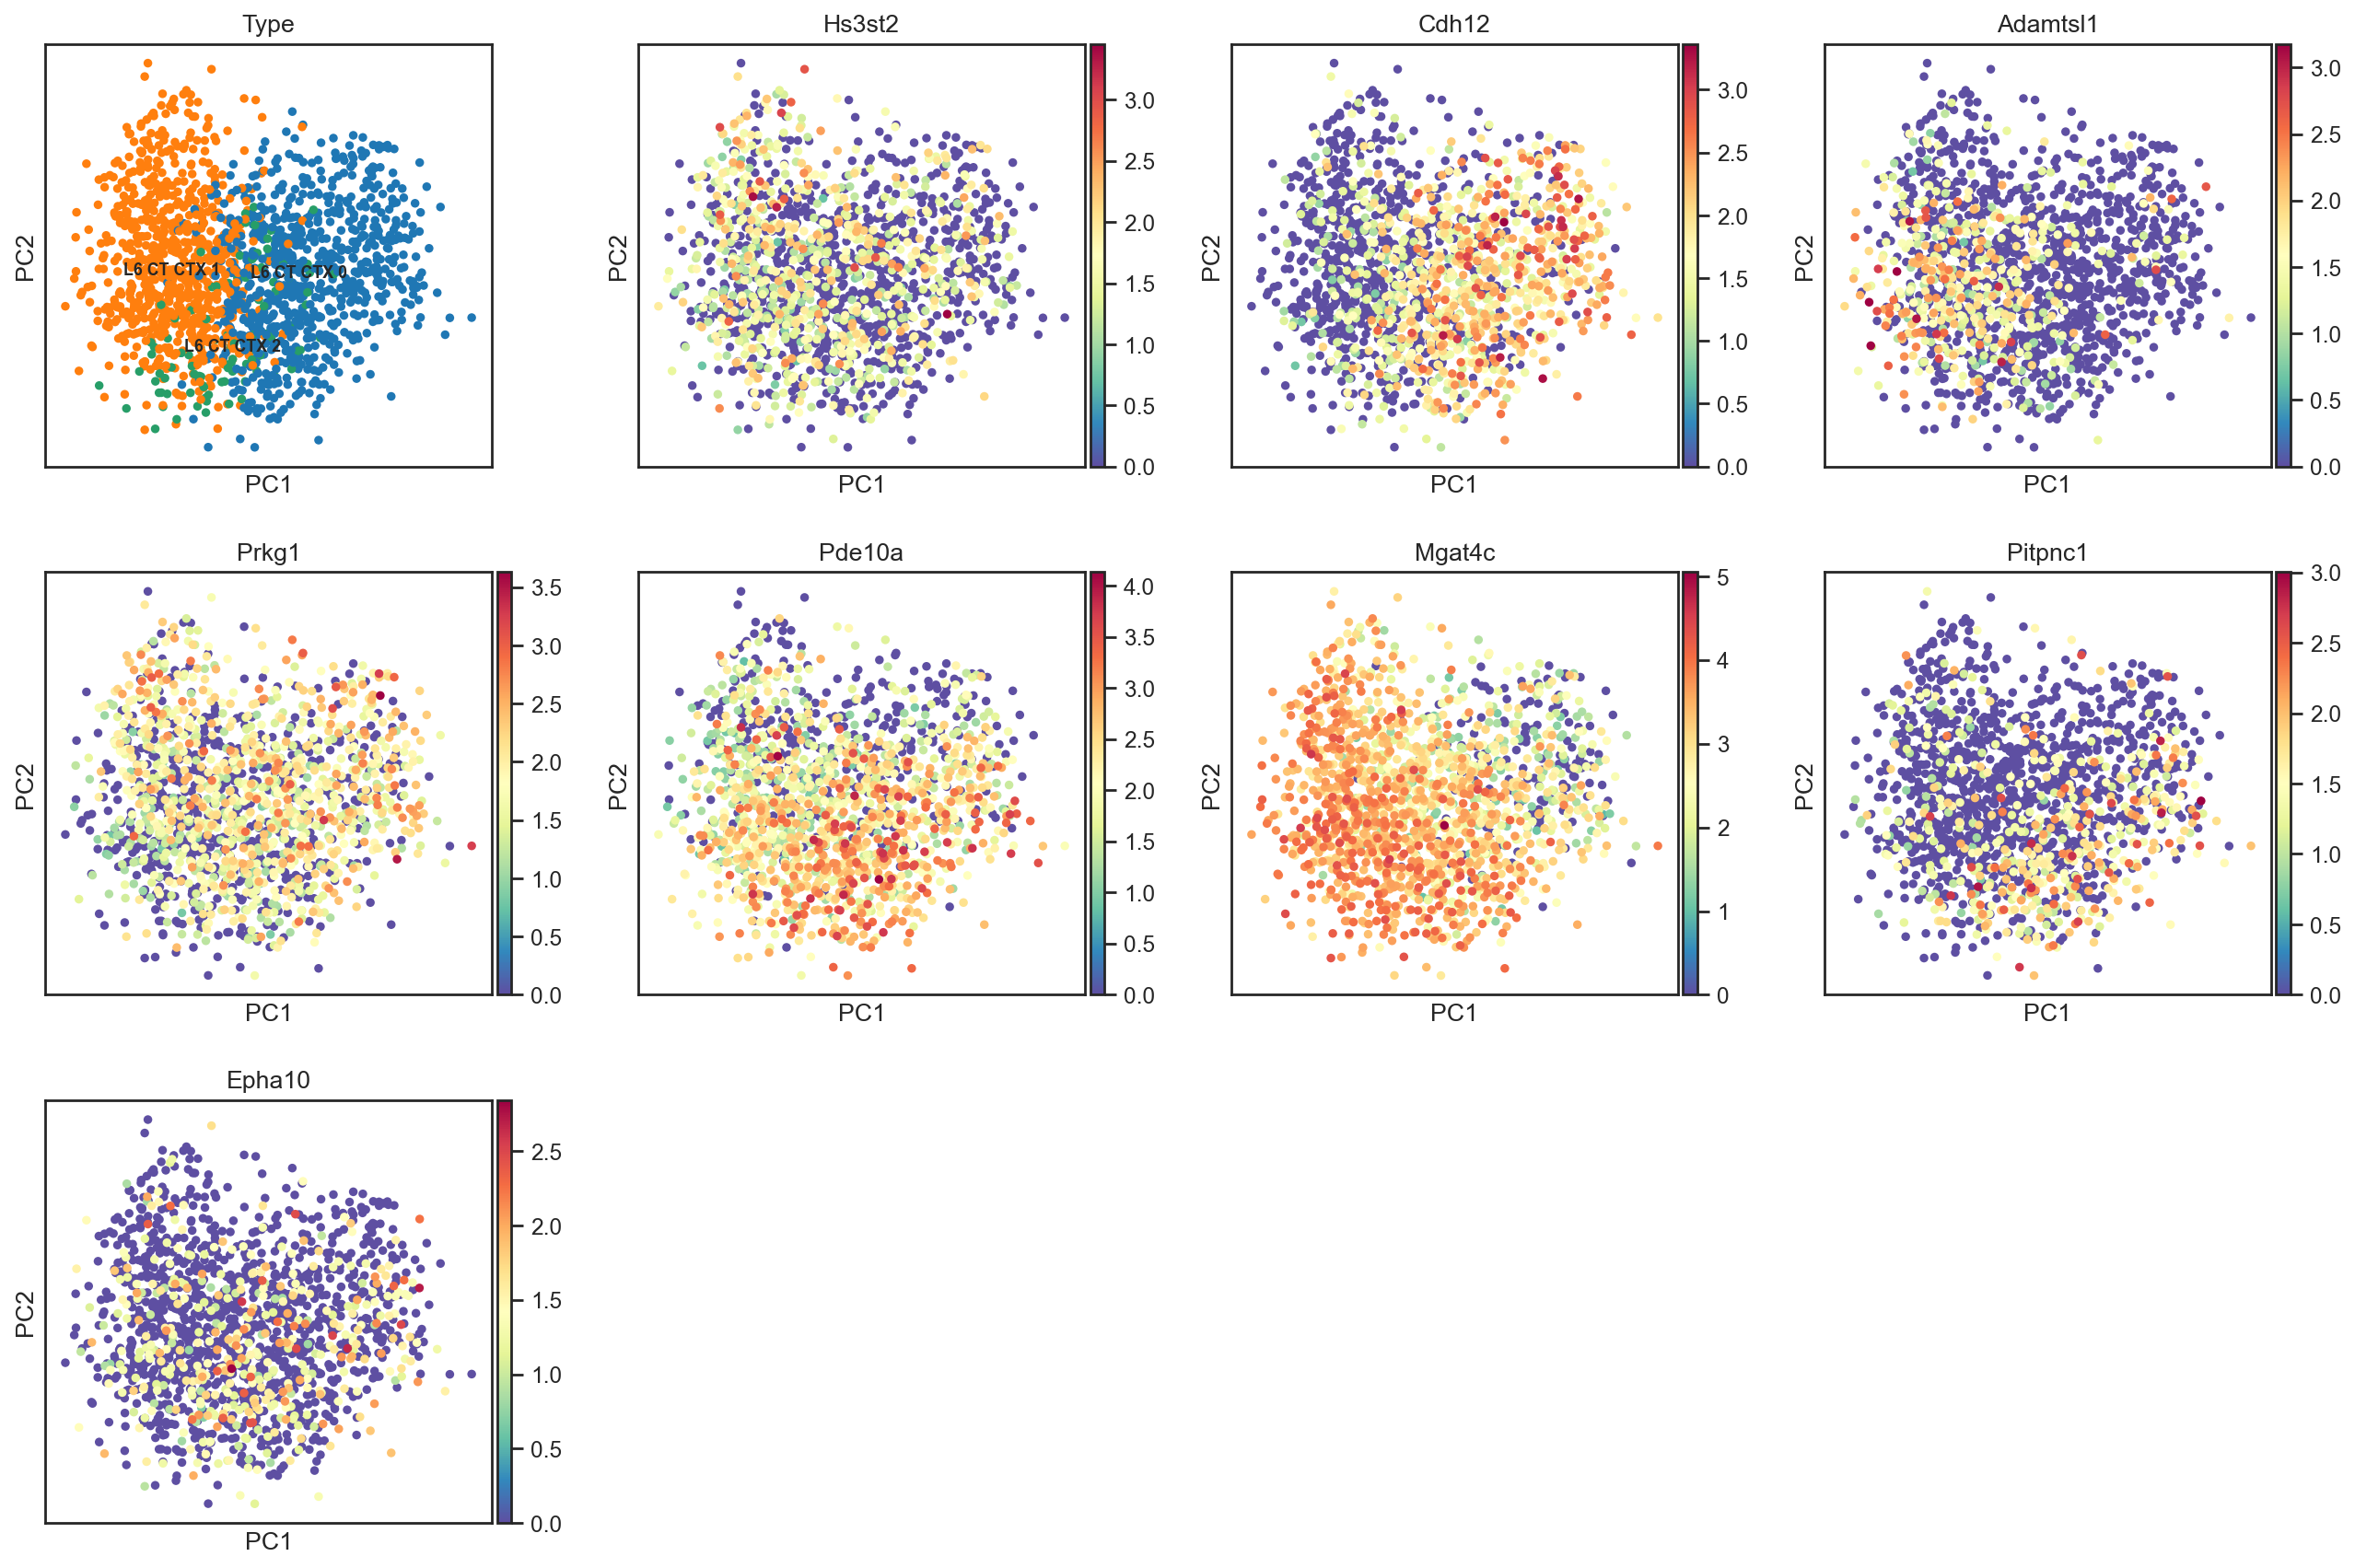

In [8]:
sc.pl.pca(dr,color=["Type","Hs3st2","Cdh12","Adamtsl1","Prkg1","Pde10a","Mgat4c","Pitpnc1","Epha10"],legend_fontsize=8,legend_loc="on data",cmap='Spectral_r')